## BAX 452 001-002 WQ 2024 Machine Learning
## Assignment 2
## Group 5
## Hitesh Kunchakuri, Shivank Chandra, Richard Liu

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score

In [2]:
directory_path = '/Users/hiteshkunchakuri/Downloads/Winter - Machine Learning/HW 3'
os.chdir(directory_path)
current_directory = os.getcwd()
print("Current working directory:", current_directory)

Current working directory: /Users/hiteshkunchakuri/Downloads/Winter - Machine Learning/HW 3


# 1. **Data Exploration and Visualization**:

- Explore the Melbourne house dataset.
- Provide visualizations such as histograms, scatter plots, or box plots to understand the distribution of different features.
- Include any other plots you find interesting and provide brief interpretations.

In [3]:
melbourne_housing = 'Melbourne_housing.csv'
melbourne_housing_df = pd.read_csv(melbourne_housing)

In [4]:
melbourne_housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         499 non-null    object 
 1   Address        499 non-null    object 
 2   Rooms          499 non-null    int64  
 3   Type           499 non-null    object 
 4   Price          391 non-null    float64
 5   Method         499 non-null    object 
 6   SellerG        499 non-null    object 
 7   Date           499 non-null    object 
 8   Distance       499 non-null    float64
 9   Postcode       499 non-null    int64  
 10  Bedroom2       371 non-null    float64
 11  Bathroom       371 non-null    float64
 12  Car            362 non-null    float64
 13  Landsize       325 non-null    float64
 14  BuildingArea   189 non-null    float64
 15  YearBuilt      212 non-null    float64
 16  CouncilArea    499 non-null    object 
 17  Lattitude      377 non-null    float64
 18  Longtitude

In [5]:
print('Shape of dataframe\n',f'Rows: {melbourne_housing_df.shape[0]}\t',f'Columns: {melbourne_housing_df.shape[1]}')

Shape of dataframe
 Rows: 499	 Columns: 21


In [6]:
melbourne_housing_df.head()
melbourne_housing_df.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
494,Sunshine,74 Hertford Rd,2,h,965000.0,S,Barry,26/08/2017,10.5,3020,...,1.0,1.0,NaN,NaN,NaN,Brimbank City Council,-37.78227,144.84038,Western Metropolitan,3755
495,Springvale,15 Phillip Av,3,h,721000.0,S,Hall,24/06/2017,20.8,3171,...,NaN,NaN,NaN,NaN,NaN,Greater Dandenong City Council,NaN,NaN,South-Eastern Metropolitan,7412
496,Middle Park,150 Page St,3,h,1750000.0,VB,Greg,27/05/2017,3.0,3206,...,2.0,0.0,138.0,155.0,1885.0,Port Phillip City Council,-37.84962,144.95856,Southern Metropolitan,2019
497,Glenroy,14 William St,3,h,501000.0,SP,Raine,28/05/2016,13.0,3046,...,1.0,1.0,348.0,NaN,NaN,Moreland City Council,-37.71190,144.91110,Northern Metropolitan,8870
498,Heidelberg Heights,1 Dennis St,3,h,NaN,S,Barry,24/06/2017,8.8,3081,...,1.0,1.0,650.0,NaN,NaN,Banyule City Council,-37.74142,145.05535,Eastern Metropolitan,2947


In [7]:
print(melbourne_housing_df.columns)

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')


In [8]:
melbourne_housing_df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,499.000000,3.910000e+02,499.000000,499.000000,371.000000,371.000000,362.000000,325.000000,189.000000,212.000000,377.000000,377.000000,499.000000
mean,3.028056,1.037080e+06,10.976152,3113.863727,3.083558,1.649596,1.737569,533.400000,152.461905,1968.117925,-37.805206,144.997510,7332.272545
std,0.945935,6.345152e+05,6.441436,111.281137,1.003251,0.785764,1.020658,677.848689,87.227886,35.950470,0.085016,0.113628,4184.540082
min,1.000000,2.100000e+05,1.200000,3000.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1879.000000,-38.138600,144.570500,768.000000
25%,2.000000,6.100000e+05,6.400000,3046.000000,2.000000,1.000000,1.000000,225.000000,97.000000,1950.000000,-37.853800,144.927300,4380.000000
50%,3.000000,8.705000e+05,10.400000,3101.000000,3.000000,1.000000,2.000000,535.000000,130.000000,1970.000000,-37.802500,144.998000,6543.000000
75%,4.000000,1.262500e+06,13.900000,3152.500000,4.000000,2.000000,2.000000,697.000000,194.000000,2001.000000,-37.750100,145.066200,9540.000000
max,6.000000,5.500000e+06,44.200000,3910.000000,10.000000,6.000000,8.000000,10100.000000,572.000000,2017.000000,-37.407440,145.440820,21650.000000


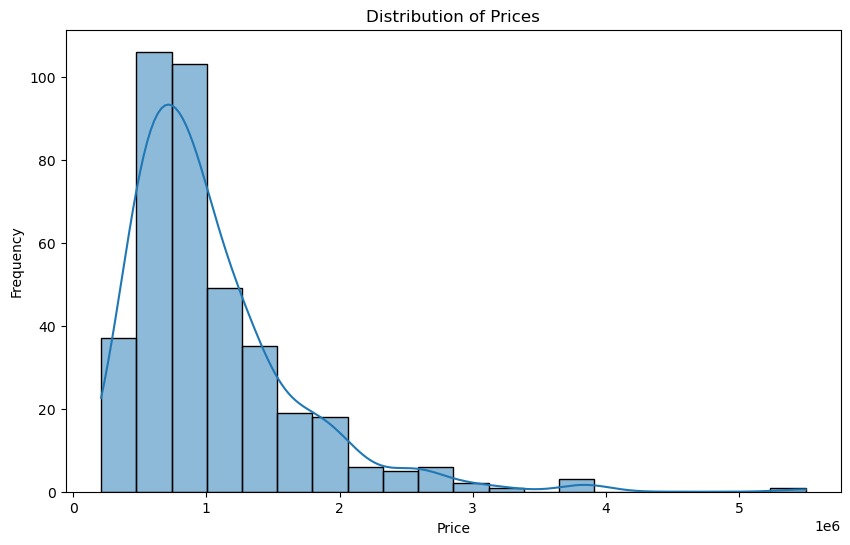

In [9]:
# 1. Histogram for Price
plt.figure(figsize=(10, 6))
sns.histplot(melbourne_housing_df['Price'], bins=20, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

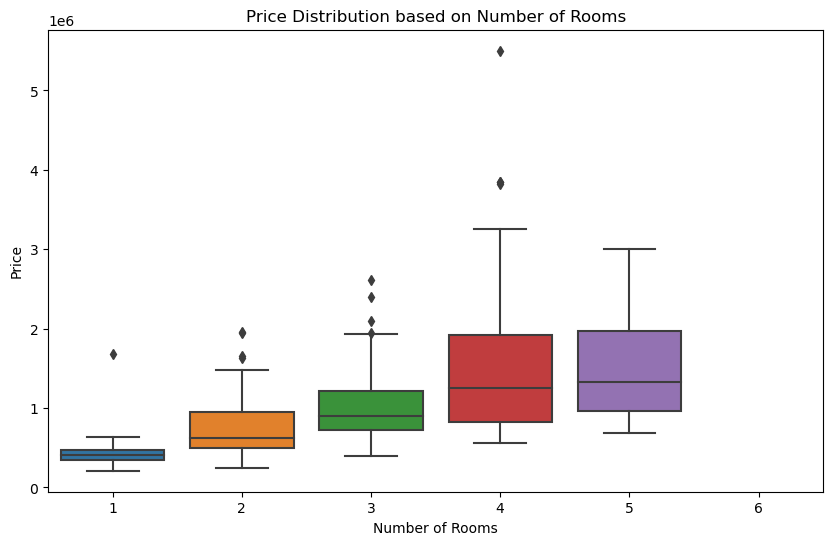

In [10]:
# 2. Boxplot for Number of Rooms
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rooms', y='Price', data=melbourne_housing_df)
plt.title('Price Distribution based on Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Price')
plt.show()

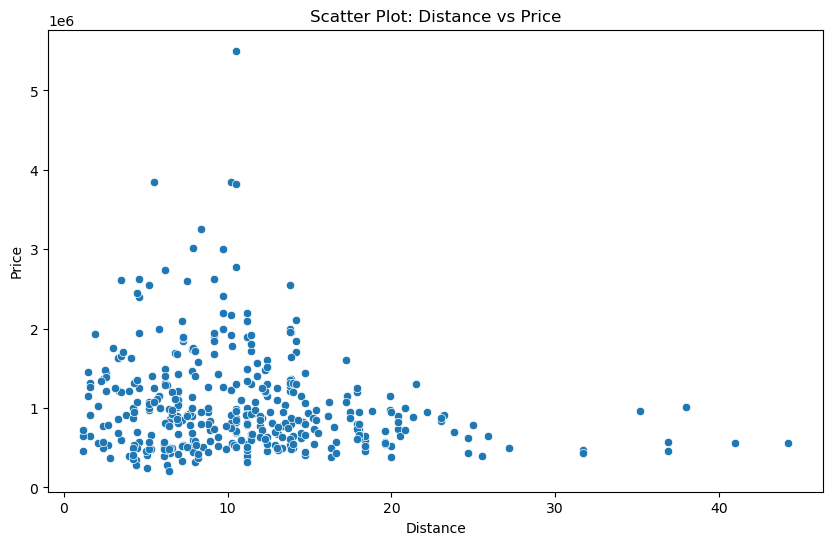

In [11]:
# 3. Scatter plot for Distance vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance', y='Price', data=melbourne_housing_df)
plt.title('Scatter Plot: Distance vs Price')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.show()

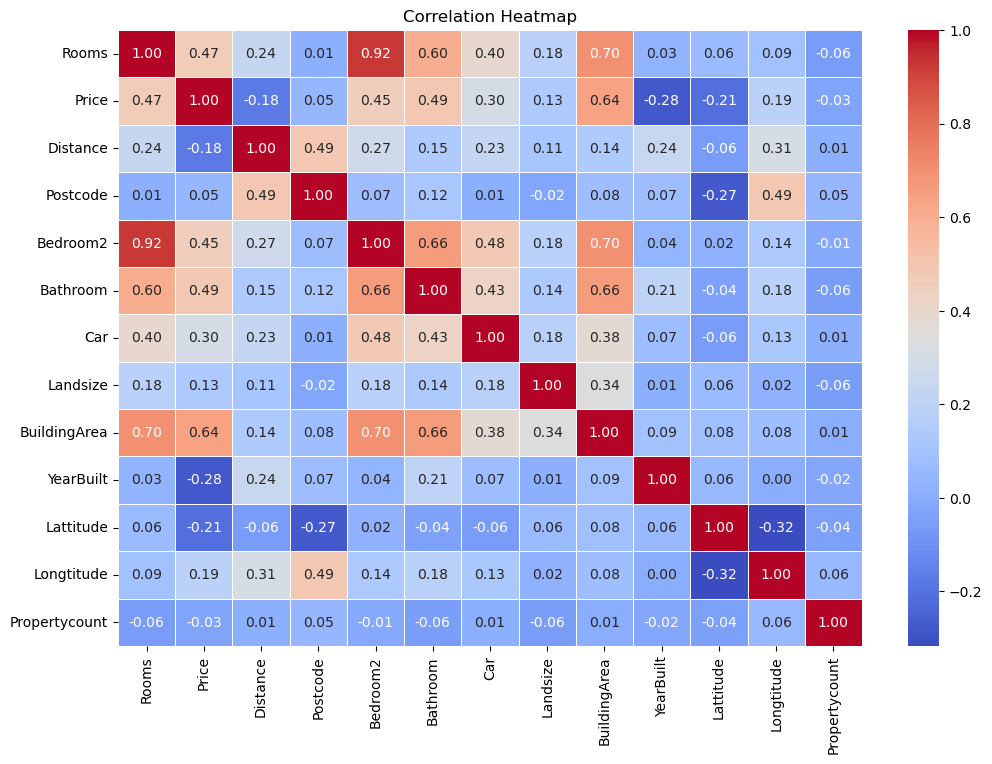

In [12]:
# 4. Assuming df is your DataFrame containing the dataset
numeric_columns = melbourne_housing_df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

# Interpretations:

1.The first graph is a Histogram for price, it can clearly show that there are way more cheaper houses in the market. 

2.The second graph is a Boxplot price distribution based on number of rooms, it shows that the price increases as the number of room increases. 
3. The third graph is a scatter plot for distance vs price. It reveals that distance might not have too much influence on the price, as it might depends on the area. 
4. The fourth graph is a heatmap for the entire dataset. It shows the correlation between all the elements. 

# 2. **Linear Regression Model Development**:
- Develop a Linear regression model to predict price of house in Melbourne.
- Preprocess the data as necessary (handling missing values, encoding categorical variables, removing unnecessary columns etc.).
- Explain the steps you took in preparing the data and developing the model.
- You might need to encode the values for your prediction.

In [13]:
# Display columns with missing values
melbourne_housing_df.isna().sum()[melbourne_housing_df.isna().sum()>0]

Price           108
Bedroom2        128
Bathroom        128
Car             137
Landsize        174
BuildingArea    310
YearBuilt       287
Lattitude       122
Longtitude      122
dtype: int64

In [14]:
# Drop rows with missing values in 'Price' column
melbourne_housing_df.dropna(subset=['Price'], inplace=True)

In [15]:
# dropping Building Area and YearBuilt as it contains too many NAs
# dropping Lattitude,Longtitude,Suburb,Address,SellerG,Date,Postcode as they are unnecessary
# dropping the bedrooms2 since it is highly correlated to rooms
# removing all the rows with NA value in price

melbourne_housing_df.drop(['Suburb', 'Address', 'SellerG', 'Date', 'Postcode', 'Lattitude', 'Longtitude', 'BuildingArea','YearBuilt','Bedroom2'], axis=1, inplace=True)
print(f'Shape of modified dataframe {melbourne_housing_df.shape}')

Shape of modified dataframe (391, 11)


In [16]:
# Impute missing values in remaining columns using Mean, Median and Mode

# Fill missing values in 'Bathroom' column with the mode
melbourne_housing_df['Bathroom'].fillna(melbourne_housing_df['Bathroom'].mode().iloc[0], inplace=True)

# Fill missing values in 'Landsize' column with the median
melbourne_housing_df['Landsize'].fillna(melbourne_housing_df['Landsize'].median(), inplace=True)

# Fill missing values in 'Car' column with the mean
melbourne_housing_df['Car'].fillna(melbourne_housing_df['Car'].mean(), inplace=True)

In [17]:
print('Shape of dataframe\n',f'Rows: {melbourne_housing_df.shape[0]}\t',f'Columns: {melbourne_housing_df.shape[1]}')

Shape of dataframe
 Rows: 391	 Columns: 11


In [18]:
print(melbourne_housing_df.columns)

Index(['Rooms', 'Type', 'Price', 'Method', 'Distance', 'Bathroom', 'Car',
       'Landsize', 'CouncilArea', 'Regionname', 'Propertycount'],
      dtype='object')


In [19]:
# converting all the categorical variables into dummy variables

melbourne_housing_df = pd.get_dummies(melbourne_housing_df,drop_first=True)

In [20]:
# Split the data into features (X) and target variable (y)
X = melbourne_housing_df.drop('Price', axis=1)
y = melbourne_housing_df['Price']

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [22]:
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [40]:
print(f'Intercept: {model.intercept_}\n')
print(f'Co-efficients: {model.coef_}\n\n')
print('In-sample R-square:',model.score(X_train, y_train))

Intercept: 804403.535945812

Co-efficients: [ 1.69527547e+05 -5.75865972e+04  2.43618334e+05  1.23326807e+05
  2.66511141e+01  3.70204824e+00 -3.54408754e+05 -5.35691924e+05
 -3.95065340e+04 -2.09633599e+05 -4.59901889e+04 -1.64101689e+05
  1.06637764e+06  7.24847547e+05 -8.99262350e+05  2.79513188e-07
  1.72601024e+05  2.39830890e+04  7.28502823e+05  4.34938885e+05
  1.30389723e+05 -5.81732760e+05 -9.26419324e+04  9.05578842e+04
 -4.85139141e+05 -1.49651116e+04 -1.00257912e+06  1.89422420e+05
  5.89611257e+04 -7.61347143e+05  5.09043307e+05  4.89766990e+05
 -7.36969973e+05  2.30630129e+04  2.85897198e+05  3.75680334e+05
  4.28781838e+04  1.90076742e+05 -8.44331418e+05  7.08678480e+04
  1.79530442e+05 -2.92478437e+05  5.09043307e+05  3.91124270e+05
 -2.51848724e+05  5.89425592e+05  9.81299137e+05]


In-sample R-square: 0.7209187065394209


Comment: 
PreparationTo prepare the model, we first had to clean the data, removed all NA value. We dropped the missing values, dropped building area and yearbuilt as it contains too many NAs, and dropped latitude, longitude, suburb, address, sellerG, date, postcode as they are unnecessary. We then impute missing values in remaining columns using Mean, Median and Mode. We coverted all the categrorial variables in the remaining data into dummy variables. 

Model:Spilt the data into features (X) and target variable (y) and split the data into training and testing sets to create and train the Linear Regression model. 


Result: The intercept of 804403.5 represents the exptected mean value of price when all the features are 0. And the coefficients represents the change of price with one unit change while all other features are constant. The sample R-square shows that about 72% of the vairance can be explained by this model.

# 3. **Model Evaluation**:
- Evaluate your linear regression model using appropriate metrics.
- Split the dataset into training and testing sets to perform this evaluation.
- Interpret these metrics to assess the performance of your model. Is it good? Why?

In [24]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [25]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'OOS Root Mean Squared Error: {rmse}')
print(f'OOS R-squared (R2) Score: {r2}')

OOS Root Mean Squared Error: 502293.49979791645
OOS R-squared (R2) Score: 0.26078996150484235


Comment: The root mean squared error(RMSE) of this model is 502293, which is not bad since the average house price in the dataset is in millions. However, the R-squared score of 0.26 is way lower than the in-sample R-squared of 0.721, which might indicate a overfitting on the training model. 

# 4. **Regularization**:
- Is there a need for Lasso regularization? Explain. (Compare test and training results)
- Set up a Lasso regression model with specified parameters and fit it to the training data.
- Perform Lasso regression on both training and test data
- Analyze and explain how the results change from previous answer.

In [26]:
# Feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# Generate an array of alpha values from 0 to 100 (exclusive) with a step of 5
alpha_values = np.arange(0, 100, 5)

# Initialize an empty dictionary to store R-squared values for each alpha
alpha_r2 = {}

# Initialize an empty list to store alpha values
alpha_list = []

# Iterate over each alpha value
for alpha_value in alpha_values:
    # Create a Lasso regression model with the current alpha
    lasso_model = Lasso(alpha=alpha_value)
    
    # Fit the Lasso model to the scaled training data
    lasso_model.fit(X_train_scaled, y_train)
    
    # Append the current alpha to the list
    alpha_list.append(alpha_value)
    
    # Calculate and store the R-squared value for the current Lasso model
    alpha_r2[alpha_value] = round(lasso_model.score(X_train_scaled, y_train), 2)

# Print the dictionary containing R-squared values for each alpha
print("R-squared values for different alpha values:")
print(alpha_r2)


/Users/hiteshkunchakuri/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/hiteshkunchakuri/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/hiteshkunchakuri/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.723e+13, tolerance: 1.235e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_m

R-squared values for different alpha values:
{0: 0.72, 5: 0.72, 10: 0.72, 15: 0.72, 20: 0.72, 25: 0.72, 30: 0.72, 35: 0.72, 40: 0.72, 45: 0.72, 50: 0.72, 55: 0.72, 60: 0.72, 65: 0.72, 70: 0.72, 75: 0.72, 80: 0.72, 85: 0.72, 90: 0.72, 95: 0.72}


In [28]:
# Lasso Regression Model
# You can adjust the alpha parameter based on your requirements

lasso_model = Lasso(alpha=20)

# Fit Lasso model to the scaled training data
lasso_model.fit(X_train_scaled, y_train)

# Make predictions on the training and test sets
y_pred_lasso = lasso_model.predict(X_test_scaled)

In [29]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred_lasso)
r2 = r2_score(y_test, y_pred_lasso)
rmse = np.sqrt(mse)

print(f'OOS Root Mean Squared Error: {rmse}')
print(f'OOS R-squared (R2) Score: {r2}')

OOS Root Mean Squared Error: 502140.7326789366
OOS R-squared (R2) Score: 0.26123953855566273


In [30]:
print(f'Intercept: {lasso_model.intercept_}\n')
print(f'Co-efficients: {lasso_model.coef_}\n\n')
print('In-sample R-square:',lasso_model.score(X_train_scaled, y_train))

Intercept: 1028338.3959044369

Co-efficients: [ 155559.05330097 -385115.65858005  171979.53604838  100978.00287092
   18104.30333273   16940.06757844 -116303.44790071 -233785.54041122
  -18969.69630125  -17198.77565838  -15721.82589187  -52451.09701062
  202199.60598831  219216.82794765 -182893.09712376       0.
    9746.0516098     6626.96879621   72740.82092612   95345.90777069
   10429.07047597  -46920.40317548  -19938.30708917   14266.8422198
  -40028.19815922   -2804.21804358 -204022.14056252   18883.19729437
   15660.76521097  -87138.77789015   59086.39773016   74506.98531462
 -202659.6734647     5321.18629478   49039.87469618   57113.57788511
    5422.29104169   32400.92183163 -135952.40486895   12802.26821337
   18250.06430571 -136184.71427144       0.           71282.77195549
 -113127.04720721  240115.24309367   56427.9996583 ]


In-sample R-square: 0.7209175163083439


In [31]:
col_dropped_byLasso=X.columns[lasso_model.coef_ == 0]
print(col_dropped_byLasso)

Index(['CouncilArea_Cardinia Shire Council', 'Regionname_Northern Victoria'], dtype='object')


Comment: Yes, there is a need for Lasso regularization. By comparing the model on both the training and test datasets, we know that in sample R-square is much higher than out of sample-Rsquared. Lasso regularization can help to solve the overfitting problem by correcting the size of coefficients. It reduces model complexity and helps improve performance. 


With the application of Lasso regularization, the model becomes simpler. However, the out of sample R-squared is still low. This might be due to the selection of alpha value. The RMSE value has not changed a lot. 

# 5. ** Out-of-sample performance **:
- Ignore all previously trained models.
- Split the data into a new training and test 80-20.
- Newly train (fit) the linear regression model on the training data.
- Newly train (fit) the lasso regression model on the training data.
- Estimate AIC, AICc, BIC, as well as 5-fold CV for both models using only the training data.
- Estimate the models true OOS performance by computing their deviance on the test data.
- Compare all (deviance) values.  Which IC is most similar to the models’ true OOS performance?  How does 5-fold CV compare?  Explain.

In [32]:
# Ignore previously trained models
# Split the data into a new training and test set (80-20)
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X, y, test_size=0.2, random_state=3)

In [33]:
# Fit the Linear Regression model on the new training data
linear_model_new = LinearRegression()
linear_model_new.fit(X_train_new, y_train_new)

LinearRegression()

In [34]:
# Fit the Lasso Regression model on the new training data
lasso_model_new = Lasso(alpha=20)
lasso_model_new.fit(X_train_new, y_train_new)

Lasso(alpha=20)

In [35]:
# Function to compute AIC, AICc, and BIC
def compute_information_criteria(y_true, y_pred, num_params):
    n = len(y_true)
    mse = mean_squared_error(y_true, y_pred)
    deviance = n * np.log(mse)

    aic = n * np.log(deviance / n) + 2 * num_params
    aicc = aic + (2 * num_params * (num_params + 1)) / (n - num_params - 1)
    bic = n * np.log(deviance / n) + num_params * np.log(n)

    return aic, aicc, bic

In [36]:
# Compute AIC, AICc, and BIC for Linear Regression
num_params_linear = len(linear_model_new.coef_) + 1
y_pred_linear = linear_model_new.predict(X_train_new)
aic_linear, aicc_linear, bic_linear = compute_information_criteria(y_train_new, y_pred_linear, num_params_linear)

# Compute AIC, AICc, and BIC for Lasso Regression
num_params_lasso = np.sum(lasso_model_new.coef_ != 0) + 1
y_pred_lasso = lasso_model_new.predict(X_train_new)
aic_lasso, aicc_lasso, bic_lasso = compute_information_criteria(y_train_new, y_pred_lasso, num_params_lasso)

In [37]:
# Estimate true out-of-sample performance by computing deviance on the test data
y_test_pred_linear = linear_model_new.predict(X_test_new)
y_test_pred_lasso = lasso_model_new.predict(X_test_new)

# R-Squared and RMSE for Linear and Lasso Models
mse_linear = mean_squared_error(y_test_new, y_test_pred_linear)
mse_lasso = mean_squared_error(y_test_new, y_test_pred_lasso)

r2_linear = r2_score(y_test_new, y_test_pred_linear)
r2_lasso = r2_score(y_test_new, y_test_pred_lasso)

rmse_linear = np.sqrt(mse_linear)
rmse_lasso = np.sqrt(mse_lasso)

In [38]:
print("Linear Regression:")
print(f"AIC: {aic_linear}, AICc: {aicc_linear}, BIC: {bic_linear}")

print("\nLasso Regression:")
print(f"AIC: {aic_lasso}, AICc: {aicc_lasso}, BIC: {bic_lasso}")

Linear Regression:
AIC: 1109.2485283460912, AICc: 1127.1344599050267, BIC: 1288.9126813609464

Lasso Regression:
AIC: 1105.2497114322025, AICc: 1121.566692564278, BIC: 1277.4278580714388


In [39]:
print("OOS Performance:\n")

print("Linear Regression:")
print("Linear Regression R-Square:",r2_linear)
print("Linear Regression RMSE:",rmse_linear)

print("\nLasso Regression:")
print("Lasso Regression R-Square:",r2_lasso)
print("Lasso Regression RMSE:",rmse_lasso)

OOS Performance:

Linear Regression:
Linear Regression R-Square: 0.6591900622246376
Linear Regression RMSE: 318456.0797766426

Lasso Regression:
Lasso Regression R-Square: 0.6729794859434863
Lasso Regression RMSE: 311947.07518464664


Comment: Lasso Regression has slightly lower AIC, BIC , and AICc value, which shows a better balance of model fit. 
The higher R-squared in Lasso Regression also show that it has a higher variance in the variable. Lower RMSE shows it is closer to the acutal value. 
If the five fold cv is close to OOS, it means that is is doing a good job. The model has more stability. 